In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import spearmanr
import os

In [2]:
df_history = pd.read_csv("C:/Users/felix.oechslein/Desktop/Analysen Elphi, Mai/Rohdaten/"+
                                    "history_ohne_vorname.csv")

#### 1 Historien-Daten bereinigen
##### ausschließlich Öffungen als Interaktionen betrachtet

df_h_bereinigt = df_history[["iid", "attrtype", "akey", "creation", "text"]]
df_h_bereinigt = df_h_bereinigt.query('attrtype == "NO" or attrtype == "HY"')
df_h_bereinigt.head()

##### creation als date im format datetime darstellen

In [4]:
df_h_bereinigt["creation"] = pd.to_datetime(df_h_bereinigt['creation'], format='%Y%m%d%H%M%S')
df_h_bereinigt.rename(columns = {"creation" : "date"}, inplace = True)
df_h_bereinigt.head()

,iid,attrtype,akey,date,text
0,182563556,NO,283914110,2022-11-18 15:14:21,|msg=223 ML Presse - 221116 Pressemitteilung J...
1,184388857,NO,284155779,2022-11-18 15:14:21,|msg=2223 NL Konzerte 221115 Empfehlungen Deze...
2,281596261,NO,284155779,2022-11-18 15:02:20,|msg=2223 NL Konzerte 221115 Empfehlungen Deze...
3,164561588,NO,268030095,2023-01-19 12:14:17,|msg=PVM NDR 2022/23 - Stand 02.08.22|hidden=t...
4,166728947,NO,284155779,2022-11-18 15:02:24,|msg=2223 NL Konzerte 221115 Empfehlungen Deze...


##### ausschließlich unique Öffnungen betrachtet

In [15]:
df_h_bereinigt = df_h_bereinigt.loc[df_h_bereinigt.groupby(["iid", "attrtype", "akey"])["date"].idxmin()]

In [17]:
df_h_bereinigt.head(50)

,iid,attrtype,akey,date,text
7932193,163094976,HY,248941187,2022-04-12 22:31:07,|msg=2122 NL Konzerte 220412|subject=Musikfest...
8621197,163094976,HY,250740360,2022-04-21 13:17:09,|msg=2122 NL Konzerte 220421|subject=Sommer-Pr...
1869675,163094976,HY,252055108,2022-06-24 18:06:21,|msg=PVM HHM Konzerte - Stand 03.05.22|event.t...
8808759,163094976,HY,252063005,2022-04-26 17:12:51,|msg=2122 NL Konzerte 220426|subject=Open+Air+...
10000251,163094976,HY,253613403,2022-05-06 19:09:03,|msg=2122 NL Konzerte 220506 Ultimative Umwels...
10466247,163094976,HY,255006862,2022-05-12 14:37:09,|msg=2122 NL Konzerte 220512|subject=Tag+der+o...
11016138,163094976,HY,255348077,2022-05-17 11:54:19,|msg=2122 NL Konzerte 220517 Saison 2022/23|su...
11815778,163094976,HY,257774629,2022-06-01 18:47:34,|msg=2122 NL Konzerte 220601 Abo sichern|subje...
6851614,163094976,HY,258519668,2022-06-09 10:32:51,|msg=2122 NL Konzerte 220608 VVK-Start|subject...
8916567,163094976,HY,260637265,2022-06-22 16:59:33,|msg=2122 NL Konzerte 220622|subject=Der+Somme...


#### Einträge für jede iid im Zeitverlauf sortieren

In [18]:
df_h_bereinigt = df_h_bereinigt.sort_values(by=["iid", "date"])

In [20]:
df_h_bereinigt.tail(50)

,iid,attrtype,akey,date,text
6327469,320483114,HY,271467421,2023-05-04 20:27:49,|msg=Double-Opt-In Mail 22/23 - NL Webshop Anm...
6327628,320484687,HY,271467421,2023-05-04 20:31:49,|msg=Double-Opt-In Mail 22/23 - NL Webshop Anm...
6327623,320484687,NO,271467421,2023-05-04 20:35:15,|msg=Double-Opt-In Mail 22/23 - NL Webshop Anm...
6329168,320484687,HY,271469718,2023-05-04 20:36:49,|msg=Willkommensmail 22/23 - NL Webshop Anmeld...
6329167,320484687,NO,271469718,2023-05-04 21:20:09,|msg=Willkommensmail 22/23 - NL Webshop Anmeld...
6329082,320489697,HY,271467421,2023-05-04 21:12:49,|msg=Double-Opt-In Mail 22/23 - NL Webshop Anm...
6329485,320490195,HY,271467421,2023-05-04 21:15:51,|msg=Double-Opt-In Mail 22/23 - NL Webshop Anm...
6329484,320490195,NO,271467421,2023-05-04 22:00:42,|msg=Double-Opt-In Mail 22/23 - NL Webshop Anm...
6336256,320490195,HY,271469718,2023-05-04 22:00:50,|msg=Willkommensmail 22/23 - NL Webshop Anmeld...
6329432,320490827,HY,271467421,2023-05-04 21:34:49,|msg=Double-Opt-In Mail 22/23 - NL Webshop Anm...


##### Textfeld bearbeiten, um DOI Mails herauszufiltern

In [25]:
df_DOI = df_h_bereinigt[df_h_bereinigt['text'].str.contains('Double-Opt-In|DOI')]

In [28]:
pd.set_option('display.max_colwidth', None)

In [29]:
df_DOI.head()

,iid,attrtype,akey,date,text
9542661,163095722,HY,248915633,2022-05-05 19:52:29,"|msg=Double-Opt-In Mail - NL Webshop Anmeldung|subject=Ihre+Newsletter-Anmeldung%3A+E-Mail-Adresse+best%C3%A4tigen|event.name=NL-Webshop-Anmeldung-erfolgt|language=de|campaign.id=248915633|event.fireDate=20220505195000|email.messageId=<174363396.248915633.7444003542575724648@hamburgkultur.de>|mimeType=campaign|event.userId=140|bccEmail=|senderName=Elbphilharmonie+Laeiszhalle+Hamburg|generatedNlids=-1,-4,10,12,14,15,16,17,18,24,25,26,27,28,31,40,41,42,43,44,45|nlType=119695712|name=Double-Opt-In Mail - NL Webshop Anmeldung|linkType=campaign.newsletterDelivered|receiverEmail=mai_531_takahashi@yahoo.co.jp|"
9558849,163095722,NO,248915633,2022-05-06 16:18:23,|msg=Double-Opt-In Mail - NL Webshop Anmeldung|userAgent=Chrome Mobile 101.0 (Android / Smartphone)|hidden=true|ip=46.114.171.96|userLanguage=de|
9559397,163095722,HY,248915637,2022-05-06 16:18:30,"|msg=Willkommensmail - NL Webshop Anmeldung|subject=Willkommen+zum+Newsletter+der+Elbphilharmonie|event.name=NL-Webshop-Anmeldung-DOI-fertig|language=de|campaign.id=248915637|event.fireDate=20220506161800|email.messageId=<174363396.248915637.8103749716419106410@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Elbphilharmonie+Laeiszhalle+Hamburg|generatedNlids=-1,10,12,14,15,16,17,18,24,25,28,29,30,31,32,34,36,40,41,42,43,44,47,56,57,58,59,60,61|nlType=-1|name=Willkommensmail - NL Webshop Anmeldung|linkType=campaign.newsletterDelivered|receiverEmail=mai_531_takahashi@yahoo.co.jp|"
3660630,163098251,HY,271456301,2022-12-22 17:59:30,"|msg=Double-Opt-In Mail 22/23 - NL HHM Konzerte|subject=Ihre+Newsletter-Anmeldung%3A+E-Mail-Adresse+best%C3%A4tigen|event.name=NL-HHM-Konzerte-DE-Anmeldung erfolgt|language=de|campaign.id=271456301|event.fireDate=20221222175600|email.messageId=<174363396.271456301.1762290124735226095@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Elbphilharmonie+Laeiszhalle+Hamburg|generatedNlids=-1,-4,10,12,13,14,15,16,17,18,19,20,21,22,23,26,27,28,29,30,31,32,33|nlType=121917771|name=Double-Opt-In Mail 22/23 - NL HHM Konzerte|linkType=campaign.newsletterDelivered|receiverEmail=medeines@yahoo.com|"
4954244,163099150,HY,271456301,2023-03-08 13:21:38,"|msg=Double-Opt-In Mail 22/23 - NL HHM Konzerte|subject=Ihre+Newsletter-Anmeldung%3A+E-Mail-Adresse+best%C3%A4tigen|event.name=NL-HHM-Konzerte-DE-Anmeldung erfolgt|language=de|campaign.id=271456301|event.fireDate=20230308131900|email.messageId=<174363396.271456301.6126020045797786904@hamburgkultur.de>|mimeType=campaign|bccEmail=|senderName=Elbphilharmonie+Laeiszhalle+Hamburg|generatedNlids=-1,-4,10,12,13,14,15,16,17,18,19,20,21,22,23,26,27,28,29,30,31,32,33|nlType=121917771|name=Double-Opt-In Mail 22/23 - NL HHM Konzerte|linkType=campaign.newsletterDelivered|receiverEmail=hibiskus03@freenet.de|"


In [30]:
index_to_drop = df_h_bereinigt[df_h_bereinigt.index.isin(df_DOI.index)].index
df_h_bereinigt.drop(index=index_to_drop, inplace=True)

##### Monate als t = 1, .... abspeichern

In [38]:
# Berechnung der neuen Spalte "month_count"
df_h_bereinigt['month_count'] = (df_h_bereinigt['date'].dt.year - 2022) * 12 + df_h_bereinigt['date'].dt.month - 3 - 1

(array([   4743., 1059199., 2245757.,  386649., 1840065.,  737250.,
        2869855.,  738242., 1526681.,  825158.]),
 array([-2. , -0.5,  1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. ]),
 <BarContainer object of 10 artists>)

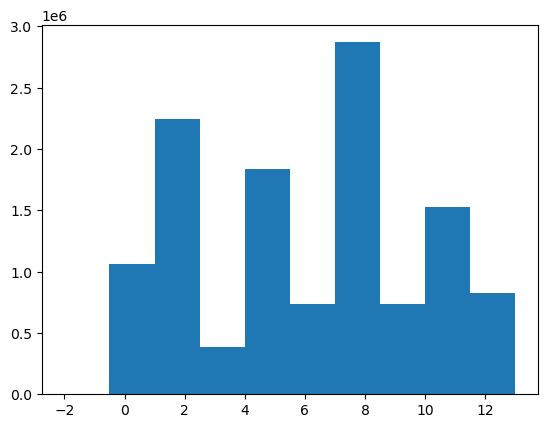

In [39]:
plt.hist( df_h_bereinigt["month_count"])

In [37]:
df_h_bereinigt['date'].max()

Timestamp('2023-05-05 09:12:47')

#### 2. verarbeiteteDaten als Elphi_history_ersteBereinigung.csv in dem Ordner verarbeitete_Daten abspeichern

In [42]:
path = r'C:/Users/felix.oechslein/Desktop/Analysen Elphi, Mai/verarbeitete_daten'
filename = 'Elphi_history_ersteBereinigung.csv'

df_h_bereinigt.to_csv(os.path.join(path, filename), index=False)